<a href="https://colab.research.google.com/github/charline-coder101/yolov8_safetyhelmet/blob/main/yolov8_safehelmet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up the environement

In [1]:
!pip install pyyaml
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.2/757.2 kB 20.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

# Load the Packages

In [18]:
from ultralytics import YOLO
import os
import glob
from IPython.display import display, Image
from IPython import display
display.clear_output()
# !yolo mode=checks

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import yaml

data = {
    'train': '/content/drive/MyDrive/css-data/train/images/',
    'val': '/content/drive/MyDrive/css-data/valid/images/',
    'test': '/content/drive/MyDrive/css-data/test/images/',
    'nc': 10,
    'names': ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest','Person', 'Safety Cone', 'Safety Vest', 'Machinery', 'Vehicle']
}

with open('safehat.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False, allow_unicode=True)

# Train the Model

In [5]:
model = YOLO('yolov8s.pt')
model.train(data='safehat.yaml', epochs=10)
model.val()

100%|██████████| 21.5M/21.5M [00:00<00:00, 384MB/s]


Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=safehat.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

100%|██████████| 755k/755k [00:00<00:00, 81.1MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 327MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/css-data/train/labels.cache... 2605 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2605/2605 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/css-data/train/images/004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/css-data/train/images/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/css-data/valid/labels.cache... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.33G       1.39       2.26      1.484        165        640: 100%|██████████| 163/163 [03:56<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        114        697      0.714      0.481      0.545      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.64G      1.292      1.457      1.394        182        640: 100%|██████████| 163/163 [00:26<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]

                   all        114        697      0.647      0.494       0.55      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.46G      1.278      1.374      1.393        165        640: 100%|██████████| 163/163 [00:25<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]

                   all        114        697      0.702      0.522       0.57      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.45G      1.246      1.272      1.362        220        640: 100%|██████████| 163/163 [00:25<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.18it/s]

                   all        114        697      0.707      0.533      0.602      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.46G      1.204      1.159      1.333        147        640: 100%|██████████| 163/163 [00:25<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]

                   all        114        697      0.771       0.59      0.658      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.73G      1.142      1.061      1.293        194        640: 100%|██████████| 163/163 [00:25<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all        114        697      0.758      0.654      0.707      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.42G      1.097     0.9677      1.256        142        640: 100%|██████████| 163/163 [00:25<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]

                   all        114        697       0.82      0.652      0.724      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.81G      1.045     0.8895      1.217        204        640: 100%|██████████| 163/163 [00:25<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]

                   all        114        697      0.862      0.662      0.745      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.56G      1.002     0.8232      1.188        137        640: 100%|██████████| 163/163 [00:25<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]

                   all        114        697      0.848      0.677      0.758       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       4.3G     0.9526     0.7598       1.16        168        640: 100%|██████████| 163/163 [00:25<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]

                   all        114        697      0.823      0.693      0.775       0.44



10 epochs completed in 0.139 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.10s/it]


                   all        114        697      0.825      0.693      0.774       0.44
               Hardhat        114         79       0.85      0.772      0.852      0.514
                  Mask        114         21      0.913       0.81      0.893      0.516
            NO-Hardhat        114         69      0.844      0.536      0.635      0.306
               NO-Mask        114         74      0.723      0.514        0.6      0.266
        NO-Safety Vest        114        106      0.805      0.613      0.706      0.386
                Person        114        166      0.833      0.735      0.817      0.458
           Safety Cone        114         44      0.878      0.841      0.871      0.459
           Safety Vest        114         41      0.853      0.709      0.852      0.547
             Machinery        114         55      0.835      0.873      0.922      0.599
               Vehicle        114         42      0.721      0.524      0.596      0.353
Speed: 0.2ms preproce

val: Scanning /content/drive/MyDrive/css-data/valid/labels.cache... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 2/8 [00:01<00:03,  1.85it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]


                   all        114        697      0.817      0.673      0.756      0.431
               Hardhat        114         79      0.848      0.775      0.857      0.519
                  Mask        114         21      0.911       0.81      0.892      0.512
            NO-Hardhat        114         69      0.813      0.536      0.643      0.305
               NO-Mask        114         74      0.718      0.516        0.6      0.261
        NO-Safety Vest        114        106      0.794      0.613      0.712      0.388
                Person        114        166      0.839      0.735       0.82      0.461
           Safety Cone        114         44      0.846      0.659      0.687      0.379
           Safety Vest        114         41      0.854      0.714      0.856      0.547
             Machinery        114         55      0.839      0.873      0.923      0.599
               Vehicle        114         42      0.707        0.5      0.575      0.337
Speed: 0.2ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c9efcc781f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

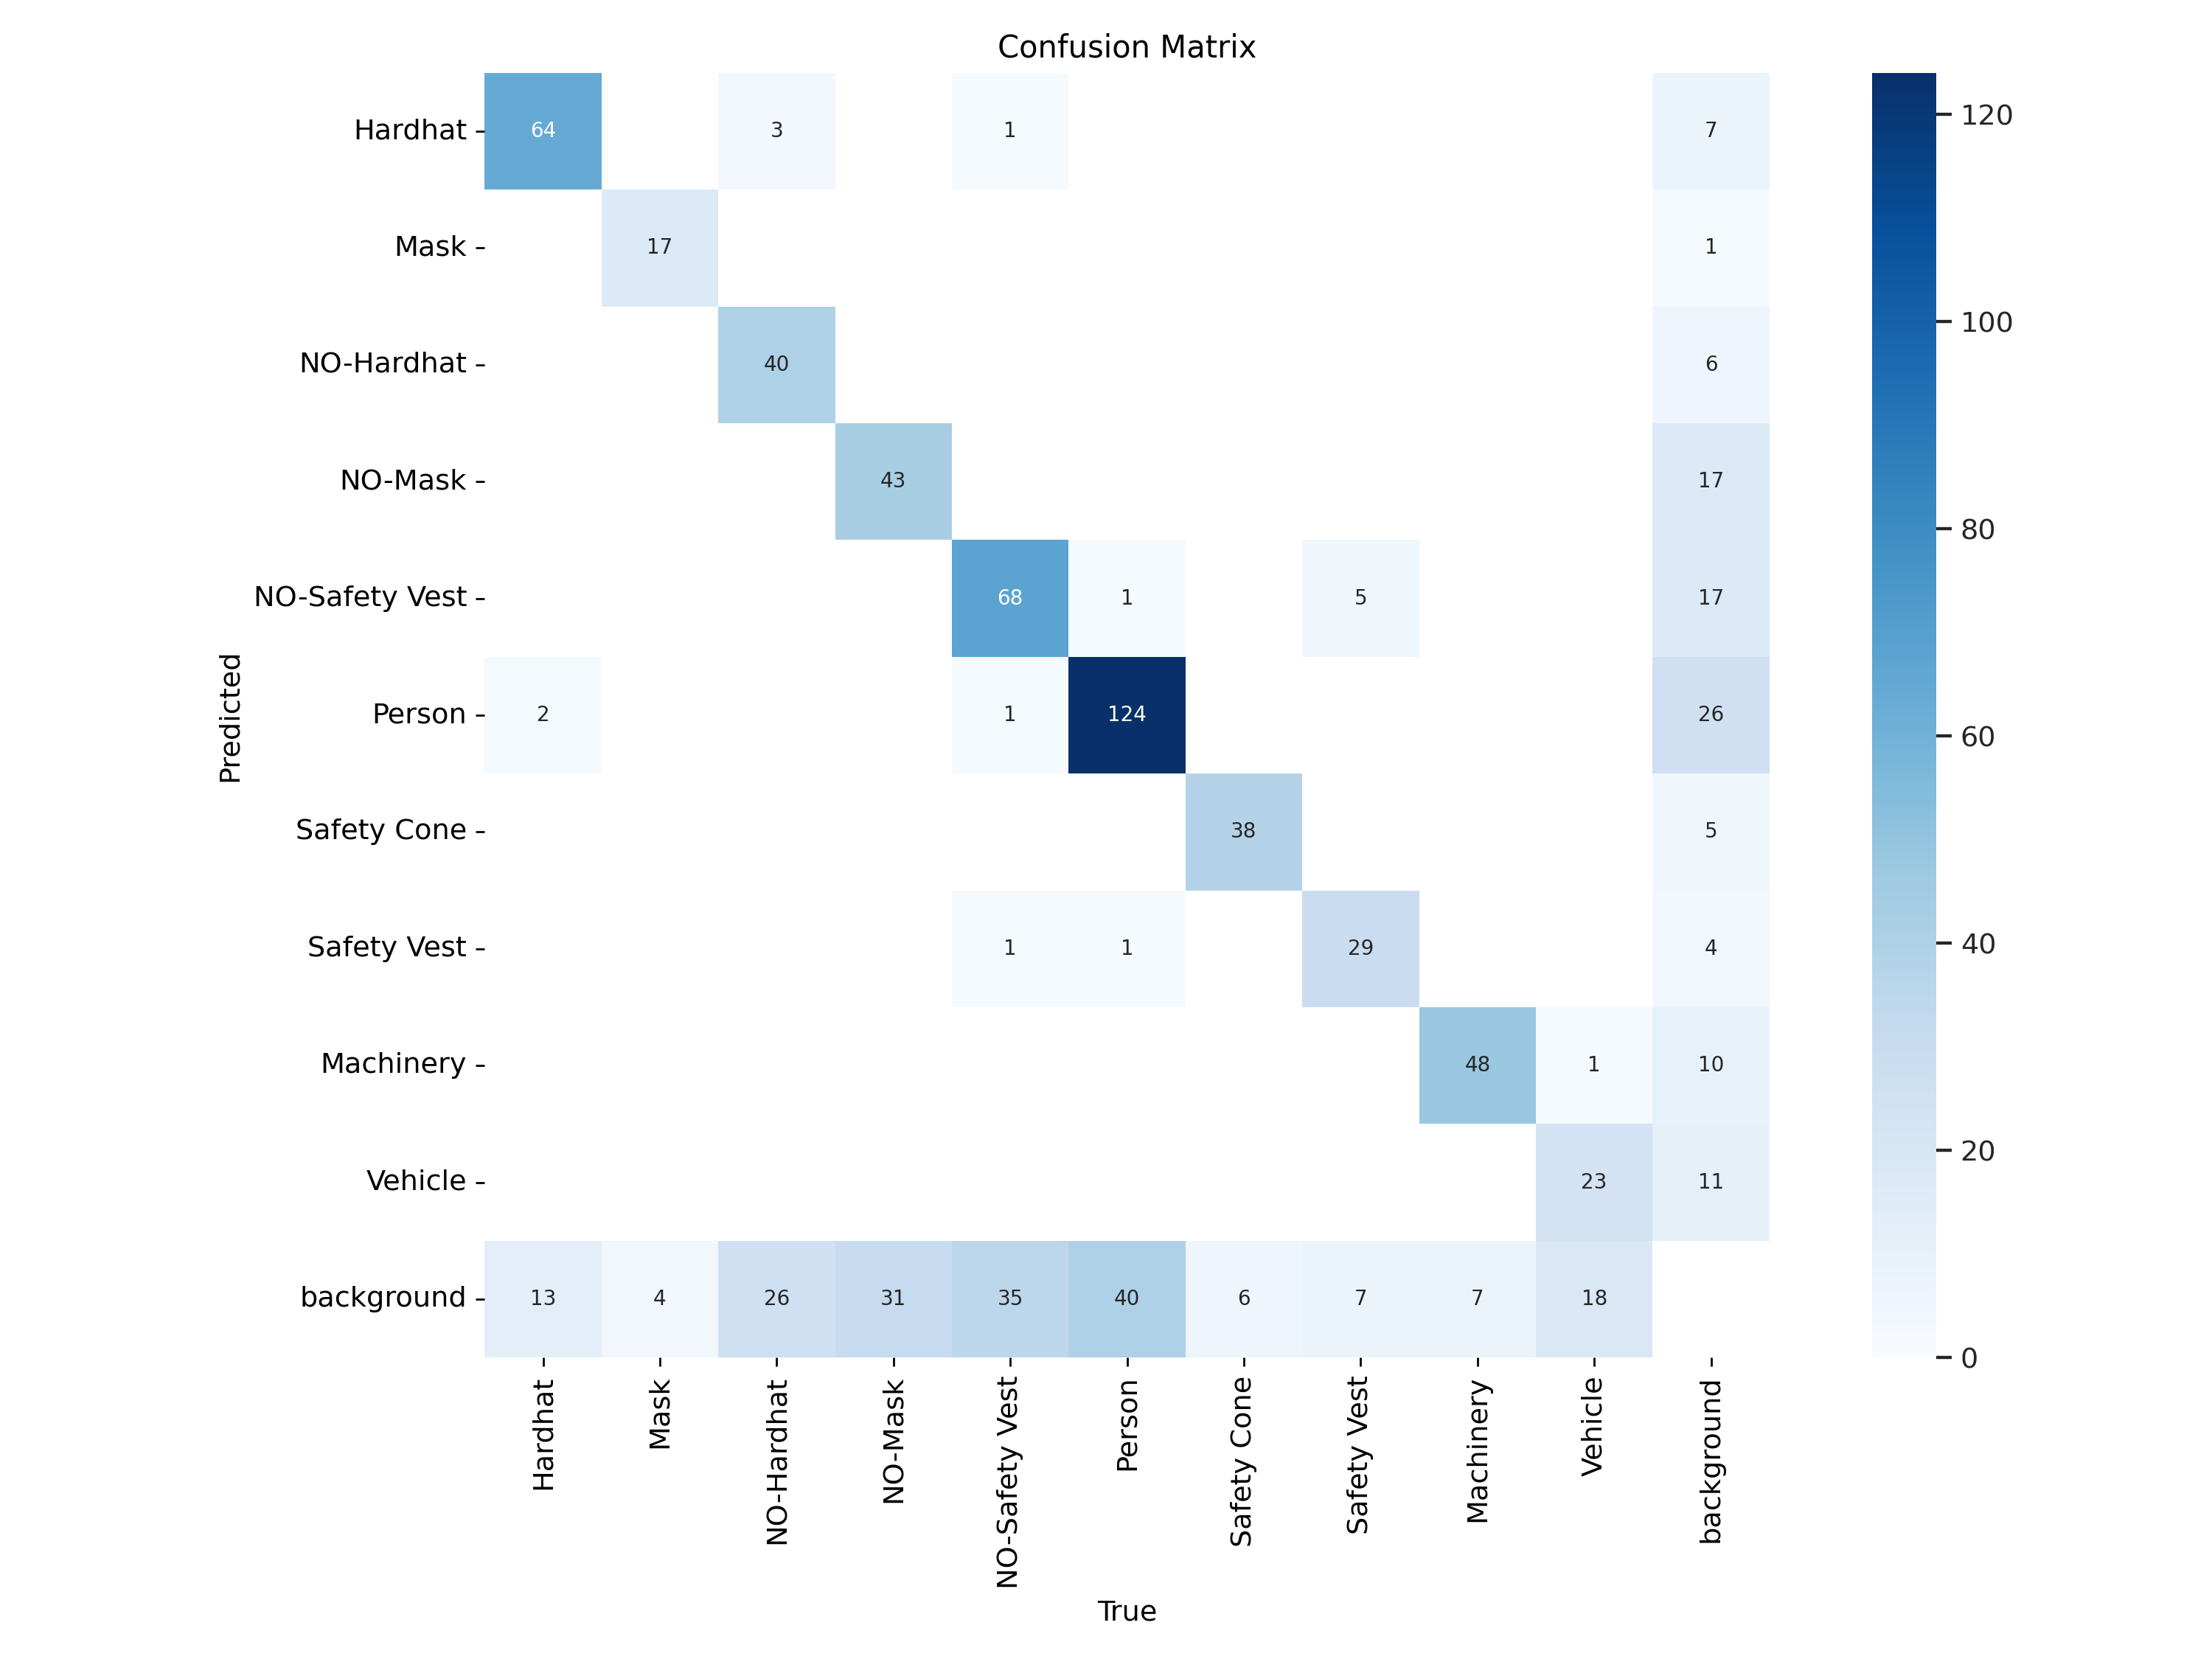

In [6]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

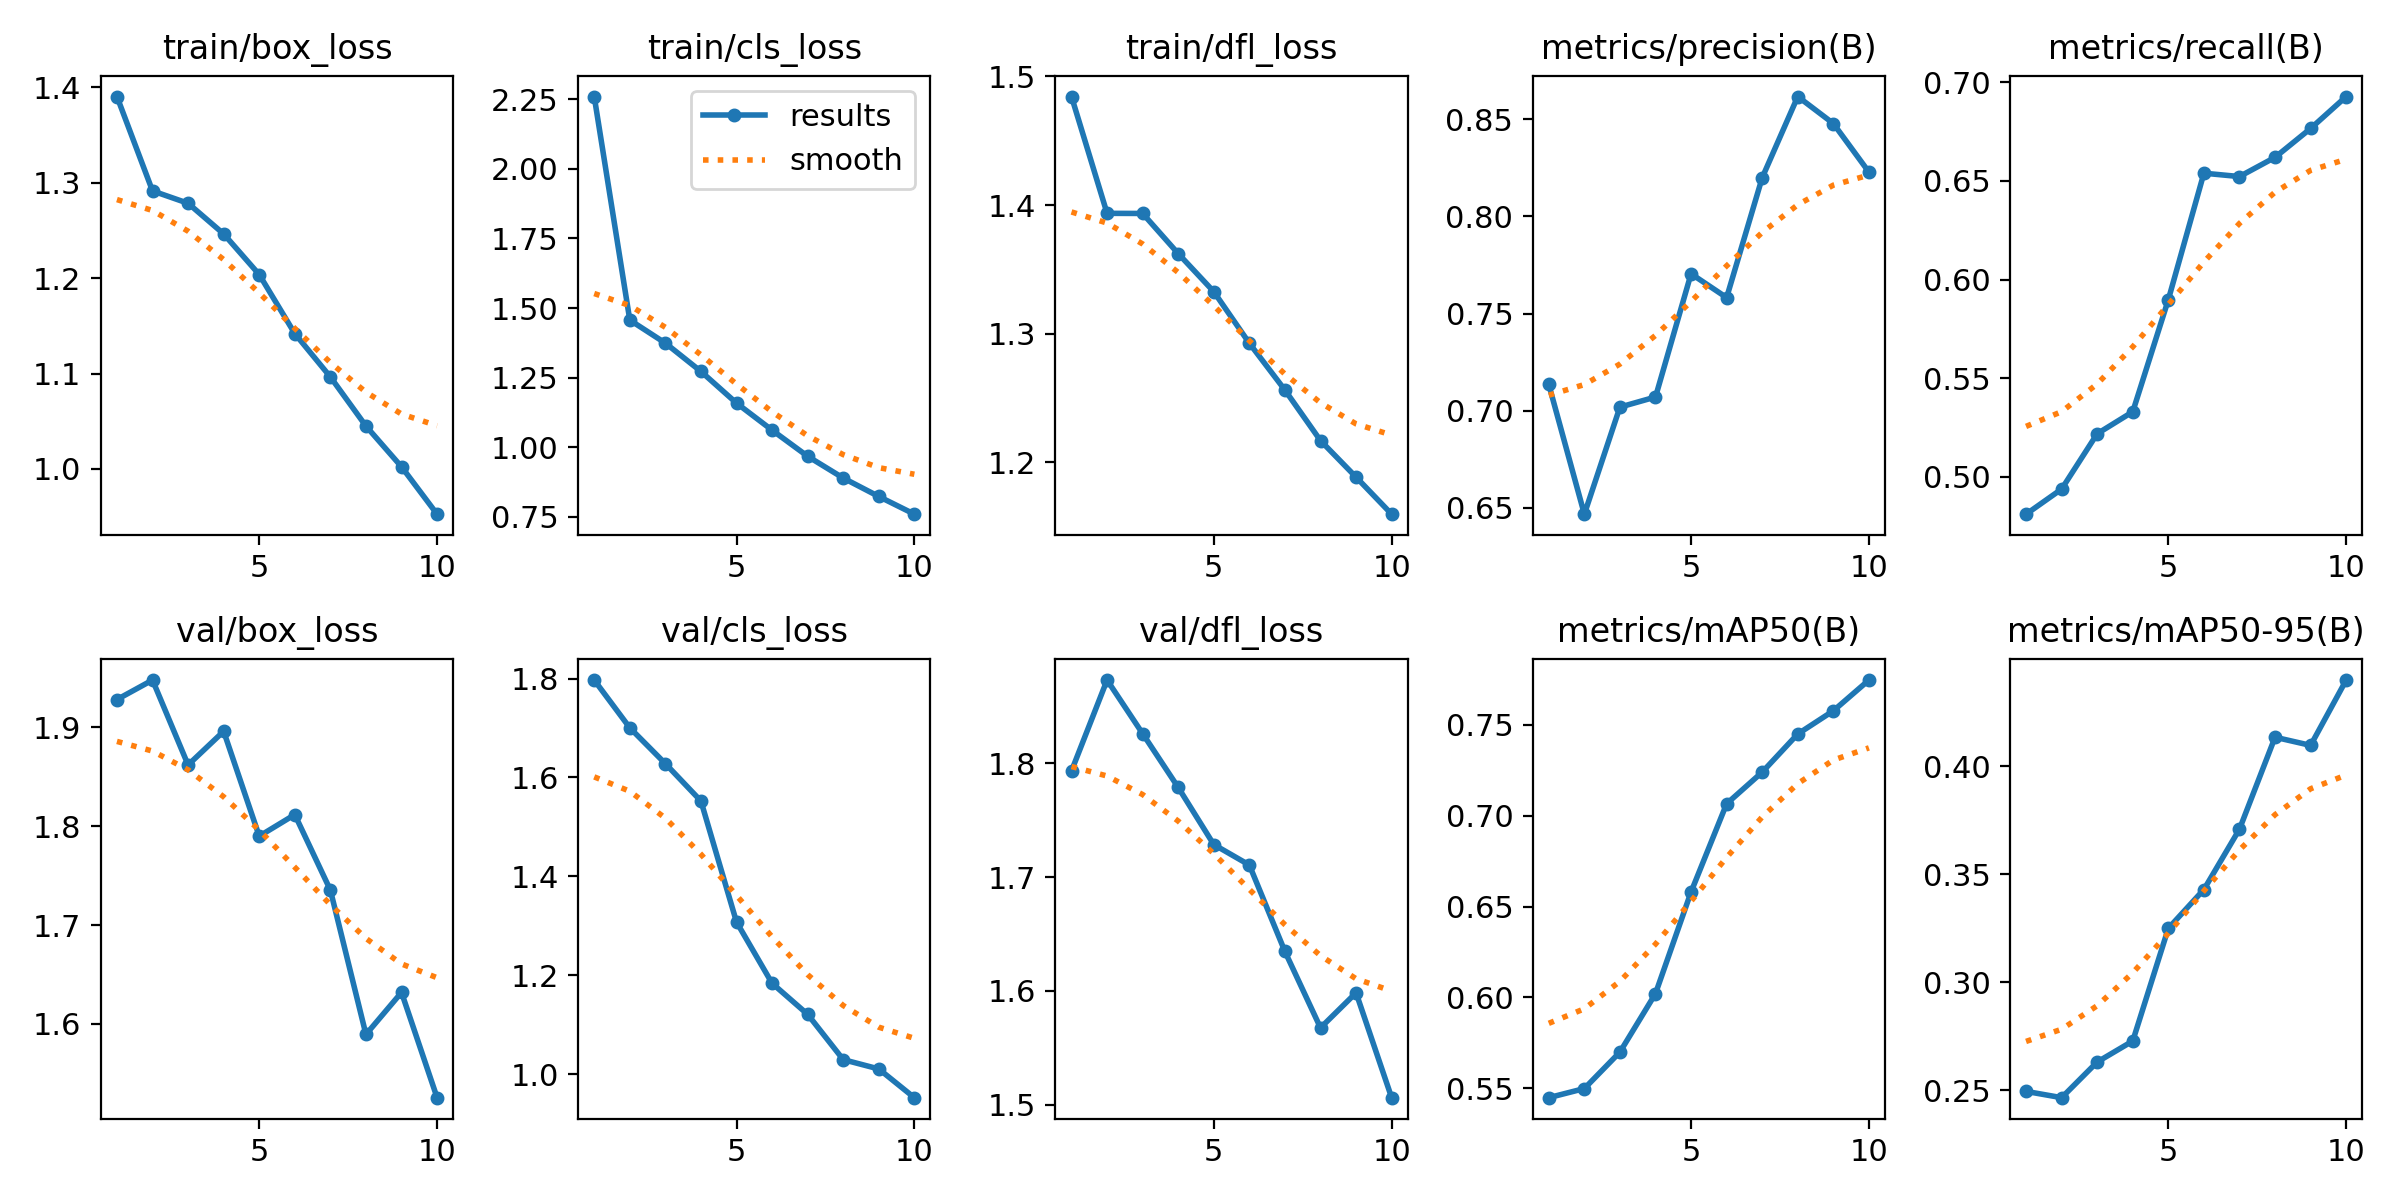

In [7]:
Image(filename='/content/runs/detect/train/results.png', width=600)

# Validate

In [12]:
# Load the best trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Customize validation settings
validation_results = model.val(data="safehat.yaml", imgsz=640, batch=16, conf=0.75, iou=0.6, device="0")

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/drive/MyDrive/css-data/valid/labels.cache... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]


                   all        114        697      0.973      0.393      0.683      0.475
               Hardhat        114         79       0.98       0.62      0.799      0.542
                  Mask        114         21          1      0.667      0.833      0.538
            NO-Hardhat        114         69          1      0.232      0.616      0.404
               NO-Mask        114         74          1      0.135      0.568      0.333
        NO-Safety Vest        114        106      0.935      0.274      0.599      0.437
                Person        114        166      0.966      0.512      0.743      0.504
           Safety Cone        114         44          1      0.273      0.636      0.461
           Safety Vest        114         41          1       0.39      0.695      0.524
             Machinery        114         55          1      0.564      0.782      0.577
               Vehicle        114         42      0.846      0.262       0.56      0.429
Speed: 0.2ms preproce

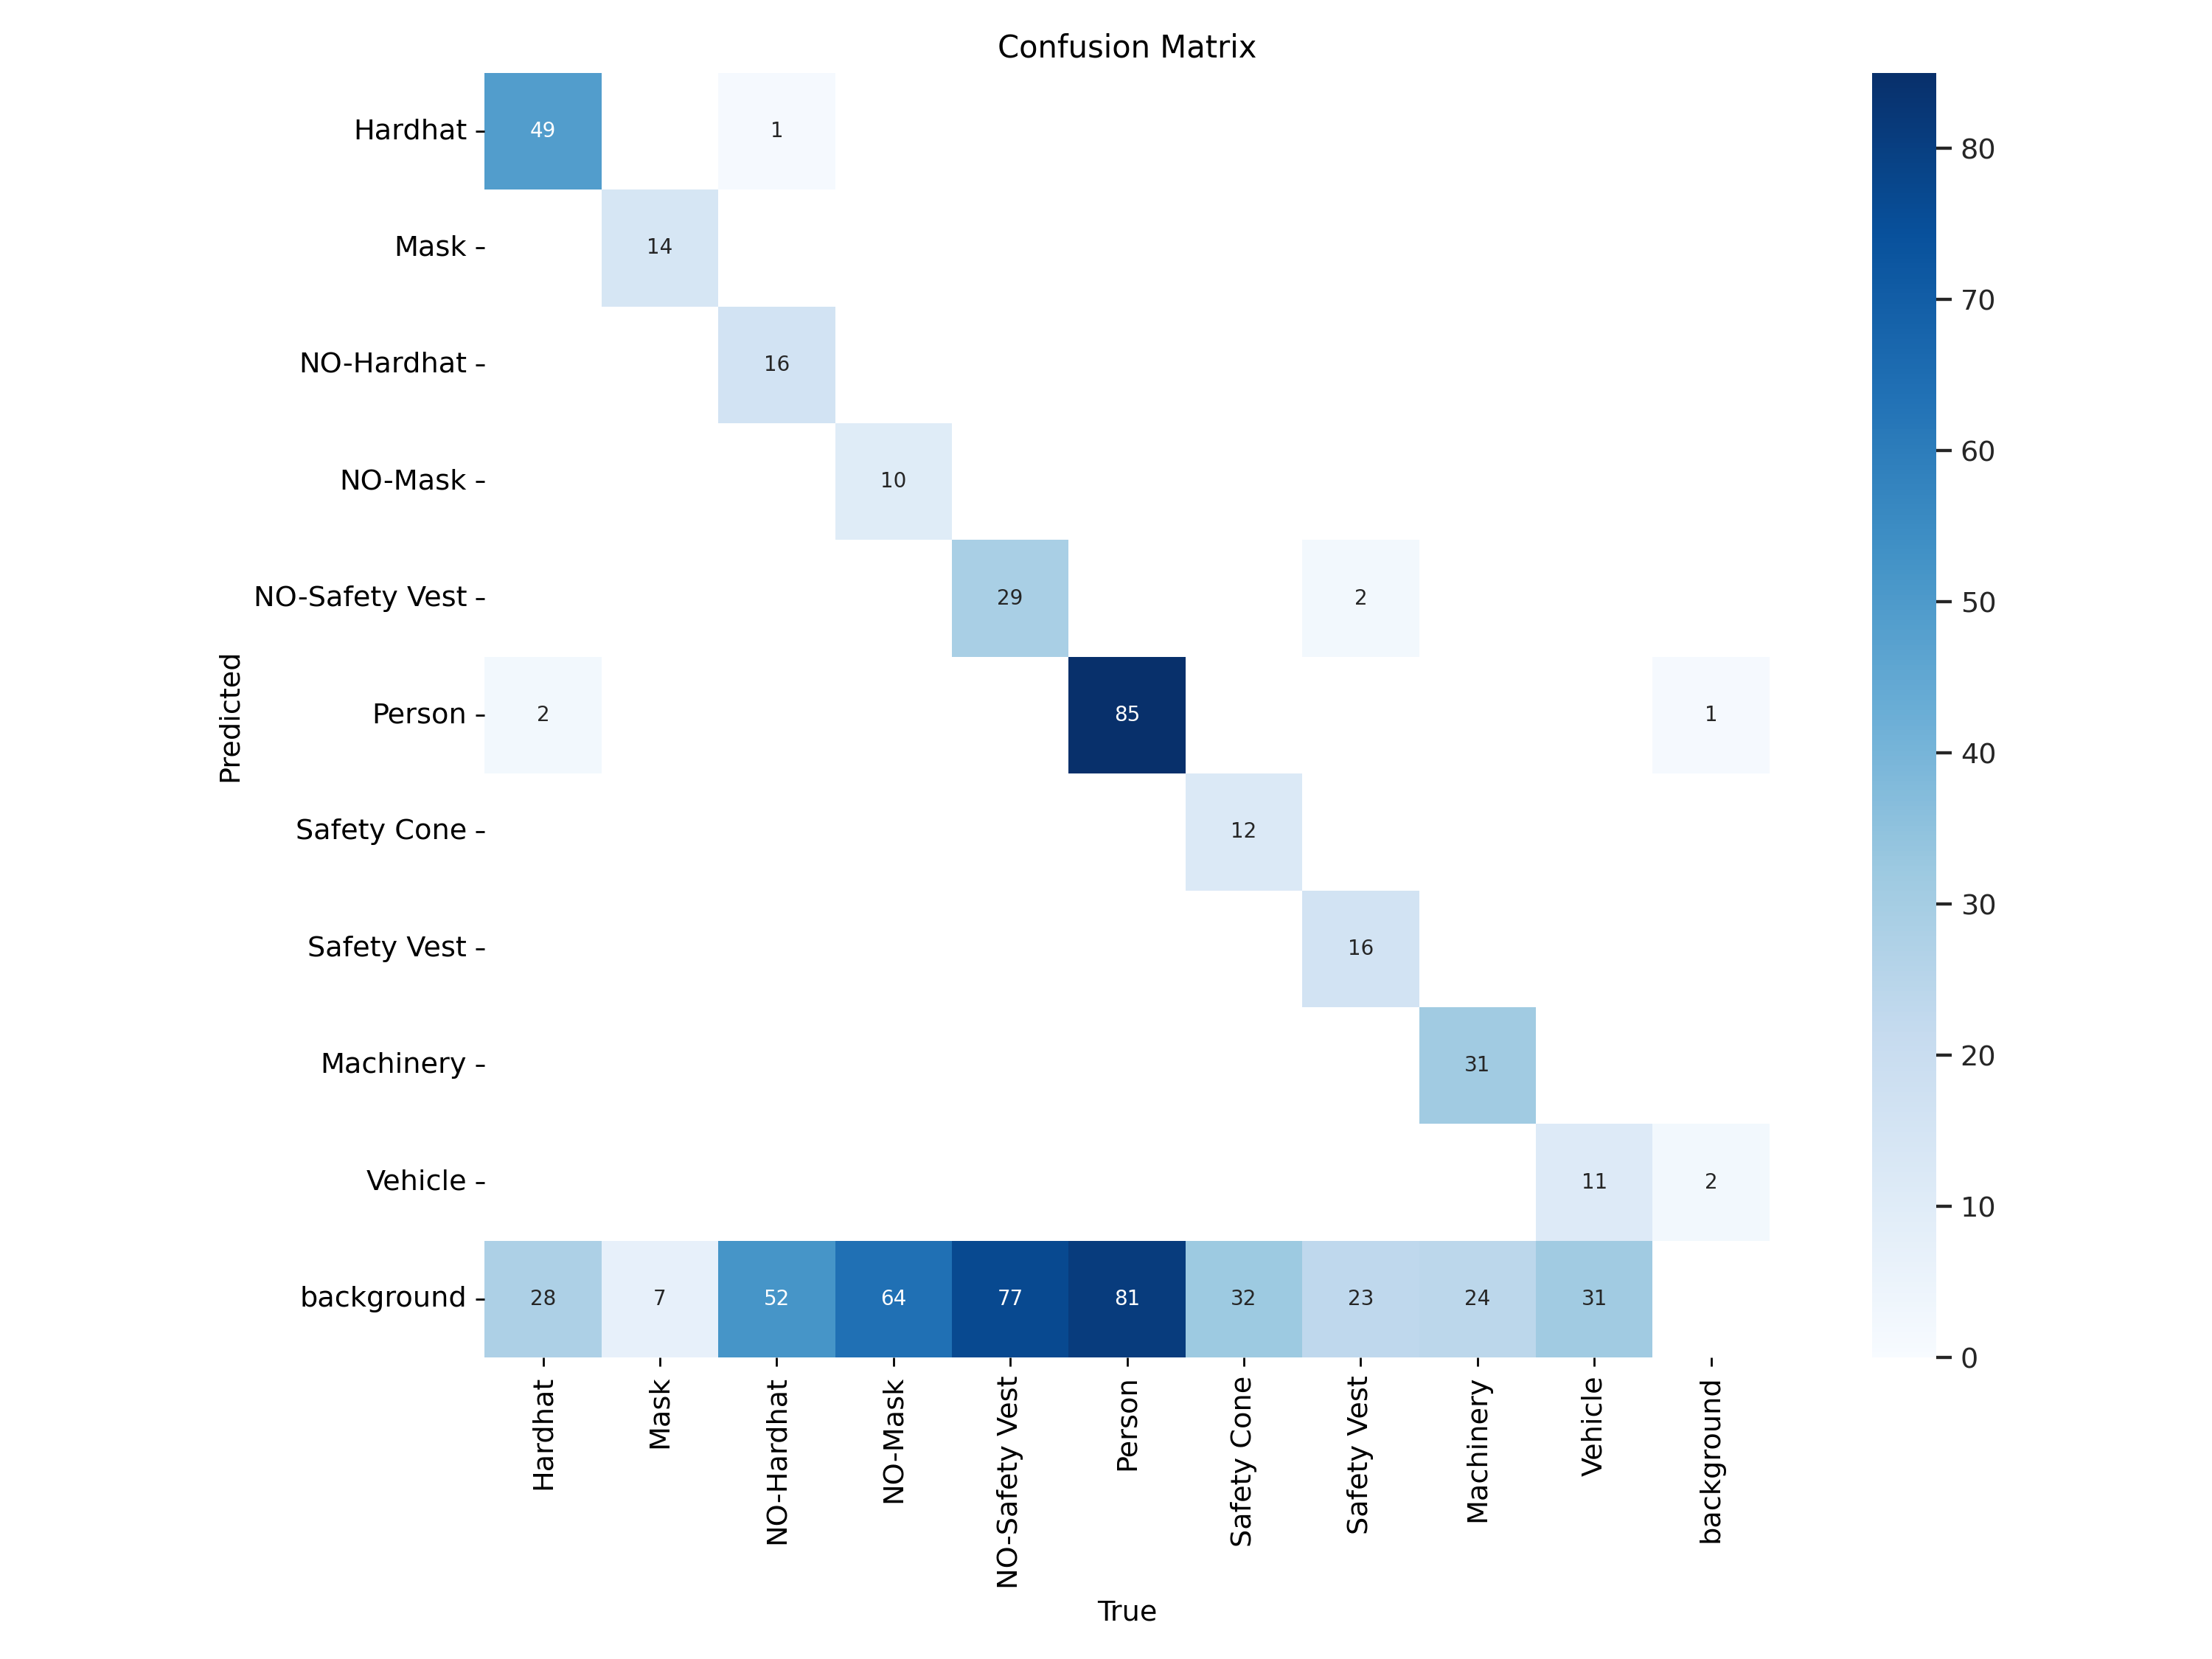

In [13]:
Image(filename='/content/runs/detect/val/confusion_matrix.png', width=600)

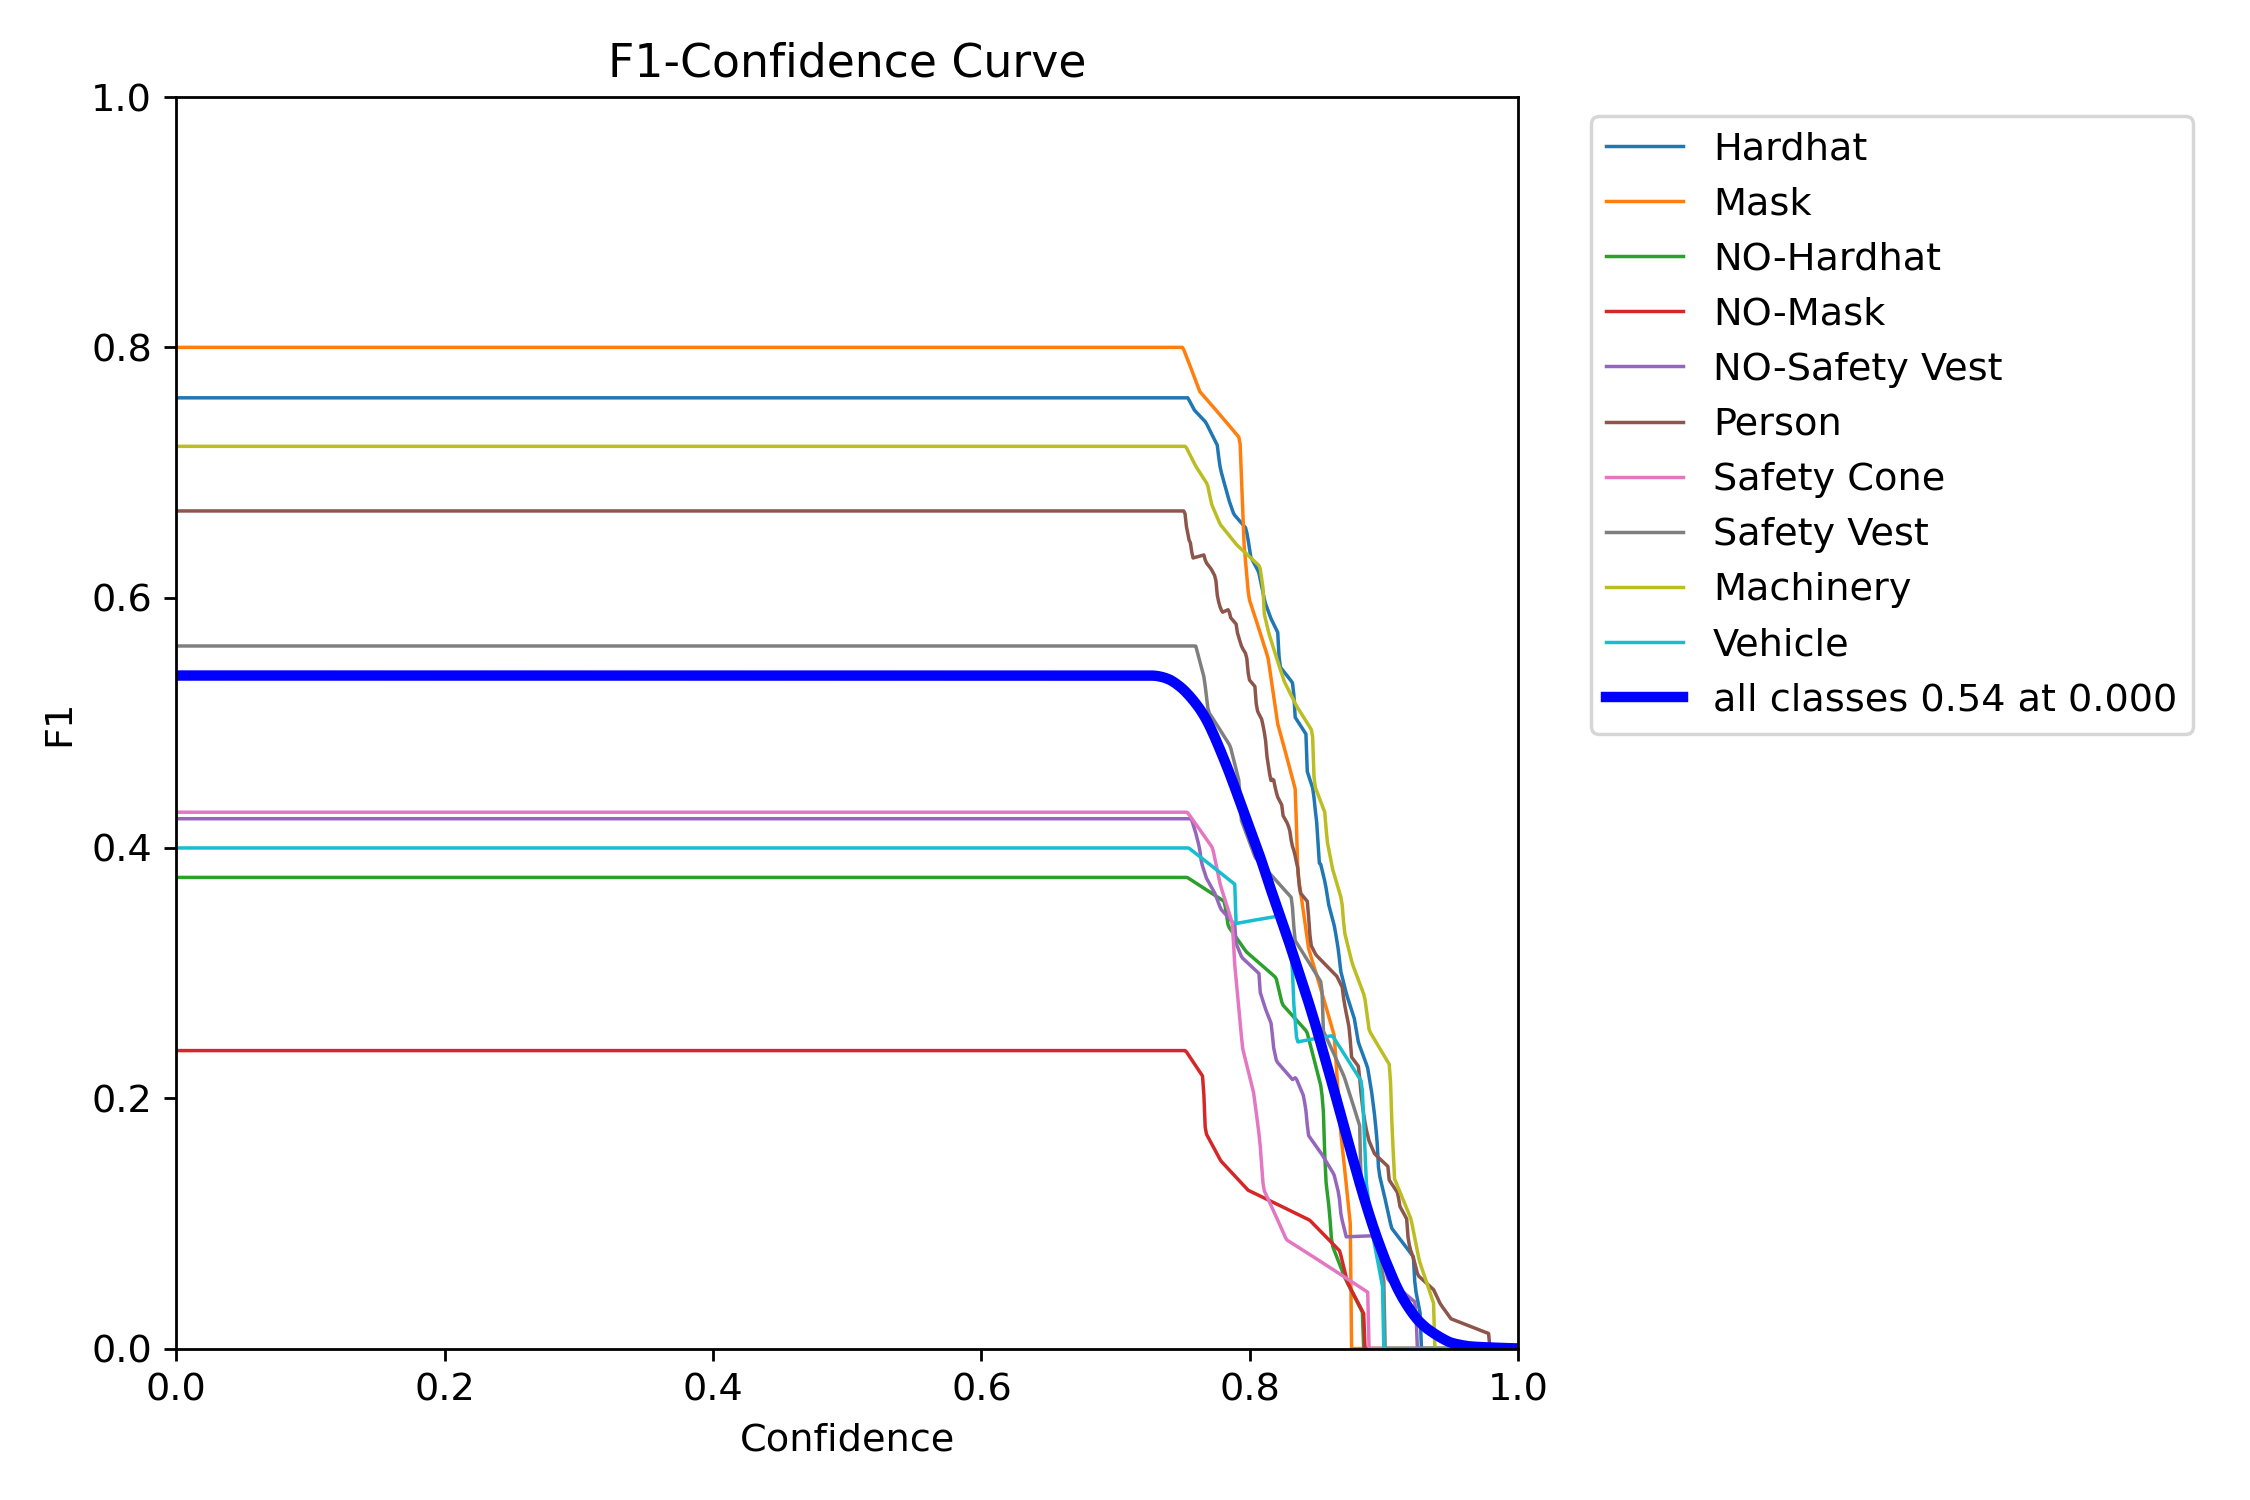

In [14]:
Image(filename='/content/runs/detect/val/F1_curve.png', width=600)

# Predict

In [28]:
model = YOLO("/content/runs/detect/train/weights/best.pt")
# results = model.predict(source="0") # camera works offline
results = model.predict(source="/content/to_predict_data", conf=0.75, show=True, save=True)  # Display preds. Accepts all YOLO predict arguments

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/3 /content/to_predict_data/mypic1.jpg: 448x640 1 Hardhat, 10.8ms
image 2/3 /content/to_predict_data/mypic2.jpg: 448x640 1 Hardhat, 1 Person, 13.7ms
video 3/3 (frame 1/667) /content/to_predict_data/clip_how_china_builds.mp4: 384x640 1 Hardhat, 1 NO-Hardhat, 1 Person, 1 Safety Vest, 12.1ms
video 3/3 (frame 2/667) /content/to_predict_data/clip_how_china_builds.mp4: 384x640 1

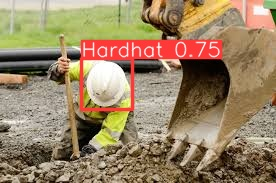

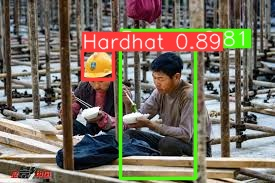

In [29]:
for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg'):
  display(Image(filename=image_path, height=300))
  print("\n")